In [43]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [3]:
dataset = pd.read_csv("tempo.csv", sep=";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [13]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [16]:
dataset.groupby(["Vento"]).size()

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [19]:
# Tratando valores nulos da coluna "Vento"
dataset["Vento"].fillna("VERDADEIRO", inplace=True)
dataset["Vento"].isnull().sum()

0

In [21]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          0
Jogar          0
dtype: int64

In [25]:
dataset["Umidade"].head()

0    85.0
1    90.0
2    86.0
3     NaN
4    80.0
Name: Umidade, dtype: float64

In [26]:
mediana = sts.median(dataset["Umidade"])
mediana

85.5

In [28]:
# Substituindo valores nulos da umidade pela mediana dos valores
dataset["Umidade"].fillna(mediana, inplace=True)
dataset["Umidade"].isnull().sum()

0

In [38]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [41]:
dataset["Umidade"].describe()

count     14.000000
mean      89.464286
std       33.204763
min       65.000000
25%       71.250000
50%       85.250000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

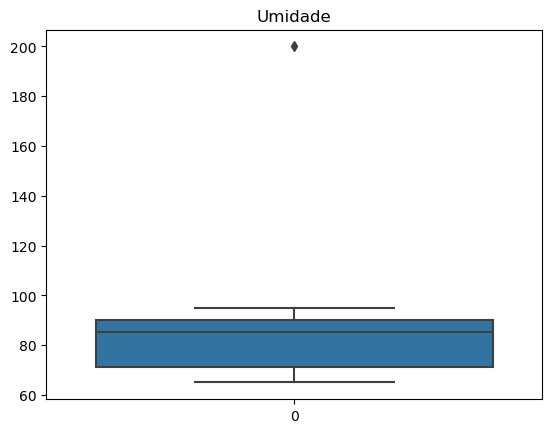

In [46]:
srn.boxplot(dataset["Umidade"]).set_title("Umidade")

In [48]:
mediana = sts.median(dataset["Umidade"])
mediana

85.25

In [50]:
# Definindo valores acima de 100 para mediana da umidade
dataset.loc[dataset["Umidade"]>= 100, "Umidade"] = mediana

In [51]:
dataset["Umidade"].describe()

count    14.000000
mean     81.267857
std       9.576847
min      65.000000
25%      71.250000
50%      85.125000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

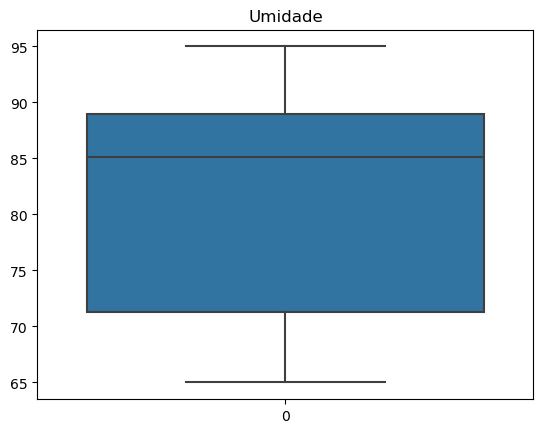

In [52]:
srn.boxplot(dataset["Umidade"]).set_title("Umidade")

In [53]:
dataset.groupby(["Aparencia"]).size()

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [54]:
dataset.loc[dataset["Aparencia"] == "menos", "Aparencia"] = "chuva"

In [55]:
dataset.groupby(["Aparencia"]).size()

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [56]:
dataset.groupby(["Jogar"]).size()

Jogar
nao    5
sim    9
dtype: int64

In [61]:
dataset["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [65]:
moda = sts.mean(dataset["Temperatura"])
moda

73.67857142857143

In [67]:
dataset.loc[dataset["Temperatura"] >= 130, "Temperatura"] = moda
dataset["Temperatura"].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64